In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core import display as ICD
import seaborn as sns
import glob
import scipy
import os
pd.set_option('display.max_columns', 100)
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
DATA_FOLDER = './avg_data/'

### Regression matrix creation

In [ ]:
def vectorize_wind(df):
    u=np.array(df.iloc[:,0])
    dir_=np.array(df.iloc[:,1])
    df.iloc[:,:2]=pd.Dataframe(np.hstack)
    return 

In [3]:
os.listdir(DATA_FOLDER)

['anem1.txt',
 'anem2.txt',
 'anem3.txt',
 'anem4.txt',
 'anem5.txt',
 'anem6.txt',
 'anem7.txt',
 'radiometer.csv',
 'surf_temp.txt']

In [4]:
all_anem=glob.glob(DATA_FOLDER + "anem*")
mast_anem=all_anem[:6]
top_anem=all_anem[6]

In [5]:
only_mag=True
h=np.arange(1.5,22,4)
df_list=[]
for idx,i in enumerate(mast_anem):
    df_temp=pd.read_csv(i, sep=" ", header=None, index_col=0, names=['u','direction'])
    df_temp['h']=h[idx]
    df_list.append(df_temp)
mast_anem_df = pd.concat(df_list)
mast_anem_df


,u,direction,h
2018-11-14 00:00:00,0.57,185.0,1.5
2018-11-14 00:01:00,0.61,248.0,1.5
2018-11-14 00:02:00,0.44,187.0,1.5
2018-11-14 00:03:00,0.63,206.0,1.5
2018-11-14 00:04:00,0.58,160.0,1.5
2018-11-14 00:05:00,0.50,209.0,1.5
2018-11-14 00:06:00,0.62,175.0,1.5
2018-11-14 00:07:00,0.69,233.0,1.5
2018-11-14 00:08:00,0.96,238.0,1.5
2018-11-14 00:09:00,0.50,203.0,1.5


In [6]:
rad_df = pd.read_csv(DATA_FOLDER+'radiometer.csv', sep=" ",index_col=0)
temp_df = pd.read_csv(DATA_FOLDER+'surf_temp.txt', sep=" ",index_col=0)
top_anem_df = pd.read_csv(top_anem, sep=" ",index_col=0,names=['u_top','direction_top'])

In [7]:
time_var_df = top_anem_df.merge(rad_df,how='left', left_index=True,right_index=True)
time_var_df = time_var_df.merge(temp_df,how='left', left_index=True,right_index=True)
time_var_df

,u_top,direction_top,Pyranometer Upper Irradiance [W/m$^2$],Pyranometer Lower Irradiance [W/m$^2$],Pyrgeometer Upper Irradiance [W/m$^2$],Pyrgeometer Lower Irradiance [W/m$^2$],Albedo [-],Net Solar radiation [W/m$^2$],Net (total) radiation [W/m$^2$],Net Far Infrared radiation [W/m$^2$],Sky temperature [°C],Radiometer Ground temperature [°C],Sensor Ground temperature [°C],North temperature [°C],East temperature [°C],South temperature [°C],West temperature [°C]
2018-11-14 00:00:00,2.71,328.0,1.8,-2.9,369.0,364.7,-1.100000,4.7,9.0,4.3,10.9,10.0,10.5,13.1,11.8,11.6,10.5
2018-11-14 00:01:00,2.60,328.0,2.2,-0.0,371.7,365.8,0.600000,2.2,8.1,5.9,11.4,10.3,10.5,13.1,11.8,11.6,10.5
2018-11-14 00:02:00,3.15,328.0,2.4,-2.1,370.7,366.0,-0.700000,4.5,9.2,4.7,11.2,10.3,10.5,13.1,11.8,11.6,10.5
2018-11-14 00:03:00,2.49,329.0,1.6,-0.8,369.0,368.5,-0.100000,2.4,3.0,0.5,10.9,10.8,10.5,13.1,11.8,11.6,10.6
2018-11-14 00:04:00,3.03,332.0,3.3,-2.6,370.0,365.9,0.100000,5.9,10.0,4.1,11.1,10.3,10.5,13.1,11.8,11.6,10.6
2018-11-14 00:05:00,2.84,333.0,3.8,-0.7,368.4,363.9,inf,4.5,9.0,4.5,10.7,9.9,10.5,13.1,11.8,11.6,10.5
2018-11-14 00:06:00,3.57,335.0,5.4,-2.3,368.4,366.8,-inf,7.6,9.2,1.6,10.8,10.4,10.5,13.1,11.8,11.6,10.5
2018-11-14 00:07:00,2.67,330.0,2.9,-2.4,370.1,364.4,0.000000,5.2,10.9,5.7,11.1,10.0,10.5,13.1,11.8,11.5,10.5
2018-11-14 00:08:00,3.00,278.0,5.0,-0.1,367.6,366.1,-1.400000,5.1,6.6,1.5,10.6,10.3,10.4,13.1,11.8,11.6,10.5
2018-11-14 00:09:00,3.35,324.0,4.6,-3.1,369.2,364.5,inf,7.7,12.4,4.7,10.9,10.0,10.5,13.1,11.8,11.6,10.5


In [23]:
tot_df=mast_anem_df.merge(time_var_df,how='left', left_index=True,right_index=True)
tot_df = tot_df.dropna(axis=0, how='any')
tot_df = tot_df.drop(columns=['Albedo [-]'])
tot_df

,u,direction,h,u_top,direction_top,Pyranometer Upper Irradiance [W/m$^2$],Pyranometer Lower Irradiance [W/m$^2$],Pyrgeometer Upper Irradiance [W/m$^2$],Pyrgeometer Lower Irradiance [W/m$^2$],Net Solar radiation [W/m$^2$],Net (total) radiation [W/m$^2$],Net Far Infrared radiation [W/m$^2$],Sky temperature [°C],Radiometer Ground temperature [°C],Sensor Ground temperature [°C],North temperature [°C],East temperature [°C],South temperature [°C],West temperature [°C]
2018-11-14 00:00:00,0.57,185.0,1.5,2.71,328.0,1.8,-2.9,369.0,364.7,4.7,9.0,4.3,10.9,10.0,10.5,13.1,11.8,11.6,10.5
2018-11-14 00:00:00,0.66,160.0,5.5,2.71,328.0,1.8,-2.9,369.0,364.7,4.7,9.0,4.3,10.9,10.0,10.5,13.1,11.8,11.6,10.5
2018-11-14 00:00:00,0.91,225.0,9.5,2.71,328.0,1.8,-2.9,369.0,364.7,4.7,9.0,4.3,10.9,10.0,10.5,13.1,11.8,11.6,10.5
2018-11-14 00:00:00,2.64,284.0,13.5,2.71,328.0,1.8,-2.9,369.0,364.7,4.7,9.0,4.3,10.9,10.0,10.5,13.1,11.8,11.6,10.5
2018-11-14 00:00:00,2.98,313.0,17.5,2.71,328.0,1.8,-2.9,369.0,364.7,4.7,9.0,4.3,10.9,10.0,10.5,13.1,11.8,11.6,10.5
2018-11-14 00:00:00,2.76,298.0,21.5,2.71,328.0,1.8,-2.9,369.0,364.7,4.7,9.0,4.3,10.9,10.0,10.5,13.1,11.8,11.6,10.5
2018-11-14 00:01:00,0.61,248.0,1.5,2.60,328.0,2.2,-0.0,371.7,365.8,2.2,8.1,5.9,11.4,10.3,10.5,13.1,11.8,11.6,10.5
2018-11-14 00:01:00,0.69,187.0,5.5,2.60,328.0,2.2,-0.0,371.7,365.8,2.2,8.1,5.9,11.4,10.3,10.5,13.1,11.8,11.6,10.5
2018-11-14 00:01:00,0.99,272.0,9.5,2.60,328.0,2.2,-0.0,371.7,365.8,2.2,8.1,5.9,11.4,10.3,10.5,13.1,11.8,11.6,10.5
2018-11-14 00:01:00,2.25,281.0,13.5,2.60,328.0,2.2,-0.0,371.7,365.8,2.2,8.1,5.9,11.4,10.3,10.5,13.1,11.8,11.6,10.5


In [31]:
np.array(tot_df.iloc[:,0])

array([0.57, 0.66, 0.91, ..., 1.92, 2.03, 2.03])

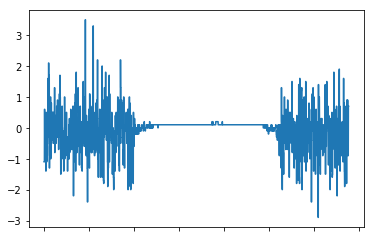

In [22]:
# tot_df[tot_df['Albedo [-]']==-np.inf]
#tot_df.index[np.isinf(tot_df).any(1)]
#tot_df.columns.to_series()[np.isinf(tot_df).any()]
#plt.plot(tot_df['Albedo [-]'].drop(np.inf))
#tot_df[~tot_df.isin([np.inf, -np.inf]).any(1)]['Albedo [-]'].plot()

### Splitting Data

In [24]:
X = np.array(tot_df.iloc[:,2:])
y = np.array(tot_df.iloc[:,0])

In [25]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.33, random_state=42)

### Regression

In [26]:
clf = Ridge(alpha=1.0)

In [27]:
clf.fit(X_tr, y_tr) 

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [28]:
clf.score(X_te, y_te)

0.7661058603538241